In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [2]:
df_Bank_Churn = pd.read_csv('../data/Bank_Churn.csv')
df_Messy = pd.read_excel('../data/Bank_Churn_Messy.xlsx')

In [3]:
print("Data preview: ")
display(df_Bank_Churn.head())

Data preview: 


,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
print("Data Info: \n")
df_Bank_Churn.info()

Data Info: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   Surname          10000 non-null  object 
 2   CreditScore      10000 non-null  int64  
 3   Geography        10000 non-null  object 
 4   Gender           10000 non-null  object 
 5   Age              10000 non-null  int64  
 6   Tenure           10000 non-null  int64  
 7   Balance          10000 non-null  float64
 8   NumOfProducts    10000 non-null  int64  
 9   HasCrCard        10000 non-null  int64  
 10  IsActiveMember   10000 non-null  int64  
 11  EstimatedSalary  10000 non-null  float64
 12  Exited           10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1015.8+ KB


In [5]:
print("Data describe:")
cm = sns.dark_palette("navy", as_cmap=True)
display(df_Bank_Churn.drop(columns=["CustomerId" ,"Geography", "Gender", "HasCrCard", "IsActiveMember", "NumOfProducts", "Exited"], axis=1).describe().T.style.background_gradient(cmap=cm))

Data describe:


,count,mean,std,min,25%,50%,75%,max
CreditScore,10000.000000,650.528800,96.653299,350.000000,584.000000,652.000000,718.000000,850.000000
Age,10000.000000,38.921800,10.487806,18.000000,32.000000,37.000000,44.000000,92.000000
Tenure,10000.000000,5.012800,2.892174,0.000000,3.000000,5.000000,7.000000,10.000000
Balance,10000.000000,76485.889288,62397.405202,0.000000,0.000000,97198.540000,127644.240000,250898.090000
EstimatedSalary,10000.000000,100090.239881,57510.492818,11.580000,51002.110000,100193.915000,149388.247500,199992.480000


In [6]:
print(df_Bank_Churn.dtypes)

CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object


In [7]:
print("Data Shape: ", df_Bank_Churn.shape)

Data Shape:  (10000, 13)


In [8]:
df_Bank_Churn.isnull().sum()

CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [9]:
category_cols = ["HasCrCard", "IsActiveMember", "NumOfProducts"]
df_Bank_Churn[category_cols] = df_Bank_Churn[category_cols].astype("category")
print("Data describe: ")
df_Bank_Churn.describe(include=["category", "object"]).T

Data describe: 


,count,unique,top,freq
Surname,10000,2932,Smith,32
Geography,10000,3,France,5014
Gender,10000,2,Male,5457
NumOfProducts,10000,4,1,5084
HasCrCard,10000,2,1,7055
IsActiveMember,10000,2,1,5151


Check Outliers Values

In [10]:
num_features = ["CreditScore", "Age", "Tenure", "Balance", "EstimatedSalary"]
def checking_outlier(list_feature, df):
    outlier_info = []
    for feature in list_feature:
        Q1 = df[feature].quantile(0.25)
        Q3 = df[feature].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        outliers = df[(df[feature] < lower_bound) | (df[feature] > upper_bound)][feature]
        print(feature, "    : ", len(outliers))
        if len(outliers) == 0:
            pass
        else:
            outlier_info.append([feature,len(outliers),outliers.tolist()])
    return pd.DataFrame(outlier_info)


checking_outlier(list_feature=num_features, df=df_Bank_Churn)

CreditScore     :  15
Age     :  359
Tenure     :  0
Balance     :  0
EstimatedSalary     :  0


,0,1,2
0,CreditScore,15,"[376, 376, 363, 359, 350, 350, 358, 351, 365, ..."
1,Age,359,"[66, 75, 65, 73, 65, 72, 67, 67, 79, 80, 68, 7..."


Data Analysis

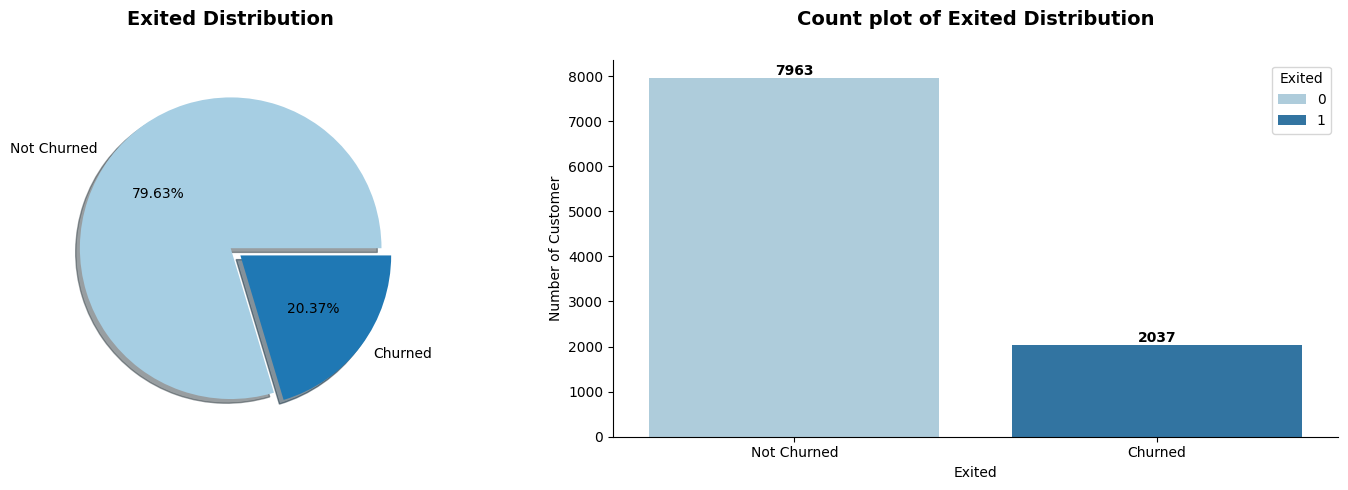

In [11]:
exited_Distribution = df_Bank_Churn["Exited"].value_counts().loc[[0, 1]]
fig, ax = plt.subplots(1, 2, figsize=(15, 5), sharey=False)

# Pie chart
ax[0].pie(
    exited_Distribution, 
    labels = ["Not Churned", "Churned"],
    colors = sns.color_palette("Paired", n_colors=2),
    autopct = "%1.2f%%", explode = (0, 0.08), shadow= True
    )

ax[0].set_title("Exited Distribution", weight="bold", fontsize=14, pad=25)

# Count plot
ax[1]= sns.countplot(data=df_Bank_Churn, x="Exited", hue="Exited", palette=sns.color_palette("Paired", n_colors=2))
ax[1].bar_label(ax[1].containers[0], fmt="%d", label_type="edge", fontsize=10, weight="bold")
ax[1].bar_label(ax[1].containers[1], fmt="%d", label_type="edge", fontsize=10, weight="bold")
ax[1].set_ylabel("Number of Customer")
ax[1].set_title("Count plot of Exited Distribution", weight="bold", fontsize=14, pad=25)
ax[1].set_xticks([0, 1], ["Not Churned", "Churned"])
ax[1] = sns.despine(top=True, right=True, left=False, bottom=False)

plt.tight_layout()
plt.show()


In [12]:
def categorical_distribution(feature, df=df_Bank_Churn, order=None, lables_text=None):
    fig, ax = plt.subplots(1, 2, figsize=(15, 5), sharey=False)

    unique_values = df[feature].unique()
    counts = df_Bank_Churn[feature].value_counts()
    order = counts.index
    max_count = counts.max()
    palette = sns.color_palette("Set2", n_colors=len(unique_values))
    

    # Count plot
    sns.countplot(data=df_Bank_Churn, y=feature, hue=feature, legend=False, ax=ax[0], order=order, palette=palette)
    ax[0].set_title(f"Count plot of {feature}", weight="bold", fontsize=14, pad=25)
    ax[0].set_xlabel("")
    ax[0].set_ylabel(feature)

    if lables_text is not None:
        ax[0].set_yticklabels(lables_text, fontweight="bold")
    
    # Write the number of each category next to the column.
    for bar in ax[0].patches:
        width = bar.get_width()
        ax[0].text(
            width + max_count * 0.01,
            bar.get_y() + bar.get_height() / 2,
            f"{int(width)}", 
            ha="center", 
            va="center", 
            fontsize=10, 
            weight="bold"
        )
    
    ax[0] = sns.despine(top=True, right=True, left=False, bottom=False)

    feature_counts = counts.sort_index()
    if lables_text is not None:
        lables = lables_text
    else:
        lables = feature_counts.index

    # Pie chart
    wedges, texts, pct_texts = ax[1].pie(
        feature_counts,
        labels=lables,
        autopct="%1.2f%%",
        explode=[0.05]*len(feature_counts),
        shadow=True,
        colors=palette,
        wedgeprops={"width":0.4}
        )
    
    for txt in texts + pct_texts:
        txt.set_fontsize(10)
        txt.set_weight("bold")
    
    ax[1].add_artist(plt.Circle((0,0),0.70, color='white'))
    ax[1].axis('equal')
    ax[1].set_title(f"Percentage Distribution of {feature}", fontsize=14, fontweight="bold", pad=20)

    plt.tight_layout()
    plt.show()

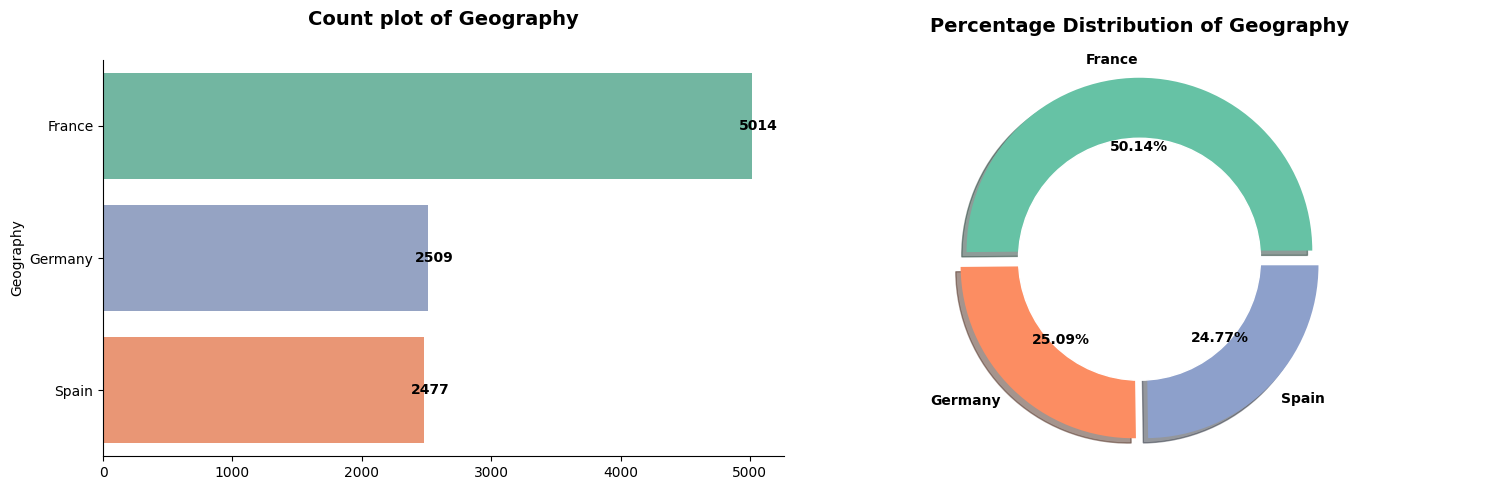

In [13]:
categorical_distribution(feature="Geography")

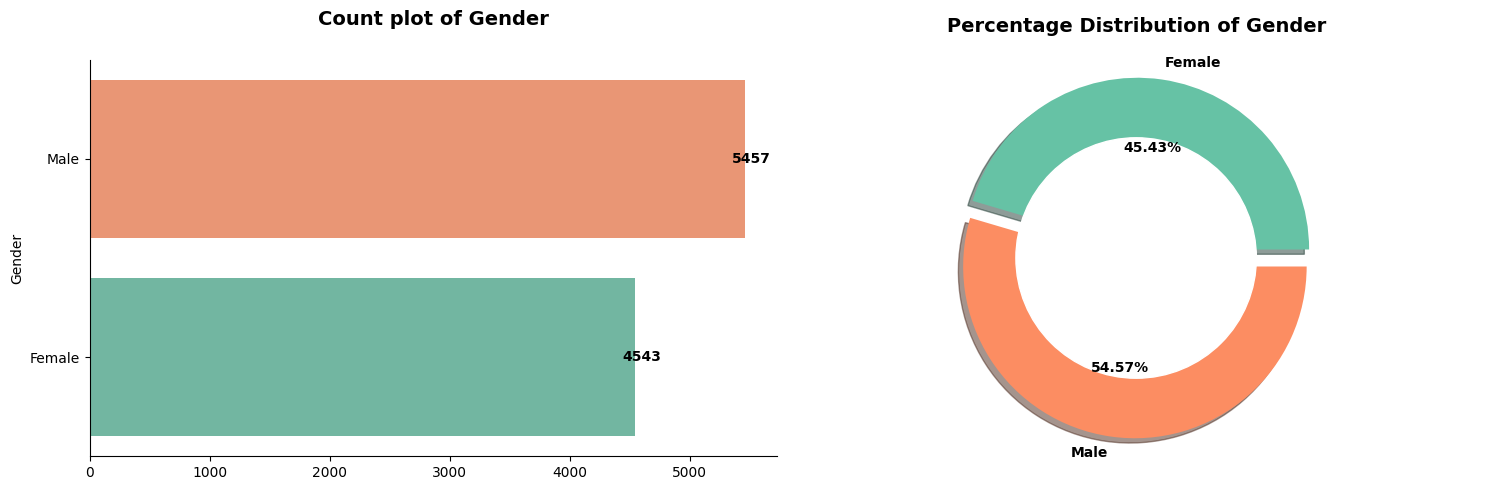

In [14]:
categorical_distribution(feature="Gender")

C:\Users\PC\AppData\Local\Temp\ipykernel_16840\2316063021.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0].set_yticklabels(lables_text, fontweight="bold")


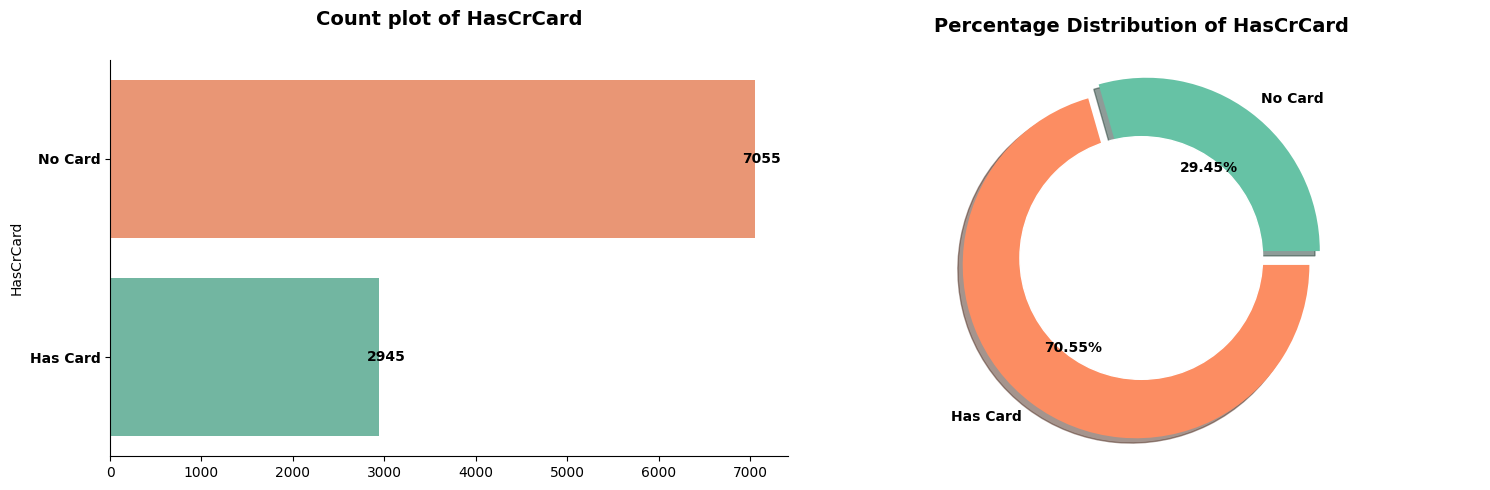

In [15]:
categorical_distribution(feature="HasCrCard", lables_text=["No Card", "Has Card"])

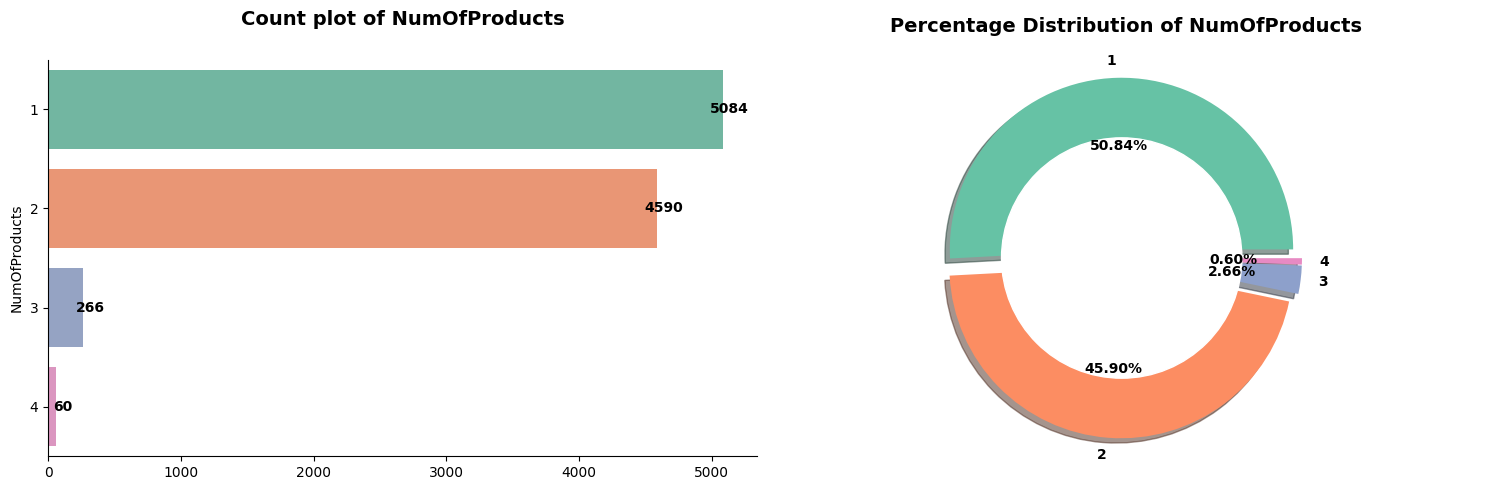

In [16]:
categorical_distribution(feature="NumOfProducts")

C:\Users\PC\AppData\Local\Temp\ipykernel_16840\2316063021.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0].set_yticklabels(lables_text, fontweight="bold")


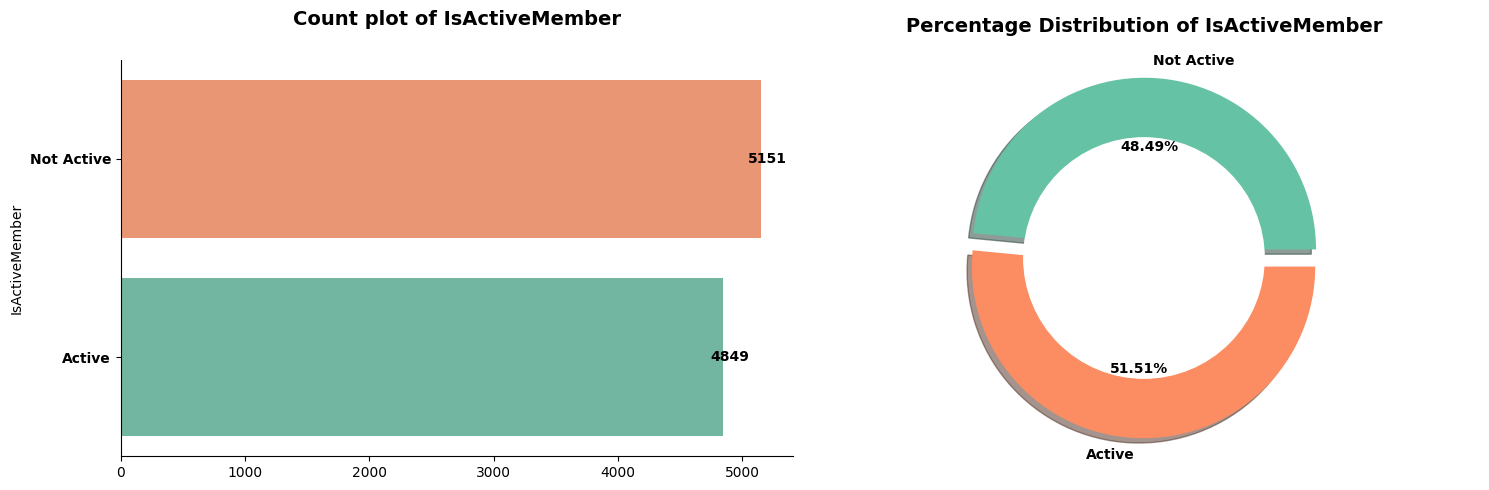

In [17]:
categorical_distribution(feature="IsActiveMember", lables_text=["Not Active", "Active"])